**Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

**Defining the Mandelbrot function**

In [2]:
def mandelbrot (x,y,t):
    c = complex(x,y)
    z = complex(0,0)
    
    for i in range (t):
        z = z**2 + c 
        if abs(z) > 4.:
            return i
        
    return t - 1 

**Glossary:**
* c: Complex number with (x,y) components
* z: Complex origin
* x_sk, y_sk: Are the starting coordinates
* width, height: Dimensions
* d_p_u: density per Unit PPU - Pixels Per Unit

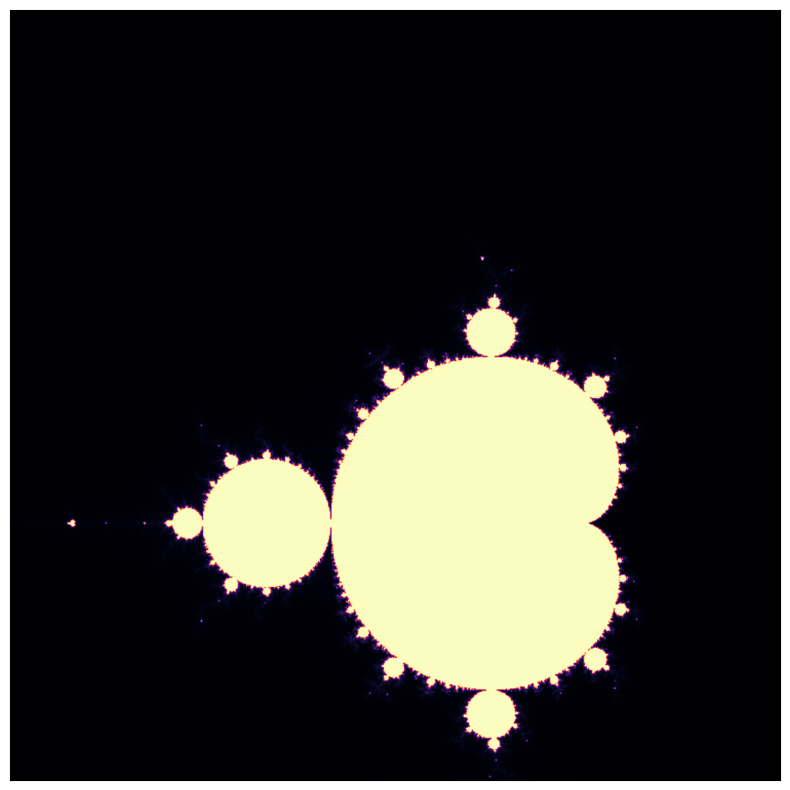

In [3]:
x_sk, y_sk = -2, -1.5 # Defining the initial region values
width, height = 3,3 # 3 Units up and right respectively
d_p_u = 250 # PPU - Pixels Per Unit, density 

#Real and Imaginary Parts
re = np.linspace(x_sk,x_sk + width, width * d_p_u)
im = np.linspace(x_sk,x_sk + height, height * d_p_u)

#Figure - fig, Axes = ax
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

def animate(i):
    ax.clear()
    ax.set_xticks([],[])
    ax.set_yticks([],[])
    
    X = np.empty((len(re), len(im)))
    t = round(1.15**(i + 1))
    
    #Iterations for the current treshhold
    for i in range(len(re)):
        for j in range(len(im)):
            X[i, j] = mandelbrot(re[i], im[j], t)
    
    img = ax.imshow(X.T, interpolation="bicubic", cmap="magma")
    return [img]

anim = animation.FuncAnimation(fig, animate, frames = 45, interval = 100, blit = True)
anim.save("mandelbrot.gif",writer = "imagemagick")